<a href="https://colab.research.google.com/github/AlaFalaki/workshop-materials/blob/main/01-NLP_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Welcome to* **"Practical Deep Learning"** *workshop!*

My name is **Ala Alam Falaki** *(Ph.D. Candidate @ UofW)*

Research Interest:



*   Natural Language Processing
*   Generative Models
*   Automatic Text Summarization




⚠️ The matterials are available on my [Github account](https://github.com/AlaFalaki/workshop-materials). You can open notebooks in the Google Colab environment and easily run them.

# How to use Google Colab?

> A quick introduction on Google Colab environment.
>
> There are two types of cells:
> *   Text
> *   Code 
> 
> You can run each cell by pressing on the ▶️ button at its left side, or press "Command+Enter" ("Ctrl+Enter" for Windows).



In [ ]:
a = 2
b = 2

print( a + b )

4


> And, you have access to free GPU for ~12 hours per day. <br />
> From the top menu, select "Runtime > Change Runtime Type" and you can select from 3 options: <br />
> 1. None: Run your codes on CPU
> 2. GPU
> 3. TPU



> You can also call Linux command in the code cells by putting a "!" before them. It is most useful because we do not have access to terminal in Free version, and by using this approach we can install/update packages that are not available.

In [ ]:
!ls

sample_data


# Install FastAI2

> Run the cell below to update the FastAi package in the node to version 2. Colab instances use the outdated version. <br /><br />
> ⚠️ Make sure to restart the current runtime after the installation for changes to affect. Select 'Runtime' From the top menu and click on 'Restart Runtime'.

In [ ]:
!pip install -Uq fastai

     |████████████████████████████████| 189 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 


# Part 1: Sentiment Analysis (Text Classification)

* Text Classification Examples
  * Social Media Analysis
  * Spam Detection
  * Tag Enquiries (Sent to Different Departments)
  * Categorize Articles, ...
* Code-first Approach to Deep Learning
* Focus on FastAI library.
 * Get near SOTA score with minimal code



# How to Feed Text to Neural Network?

> Comparing to Vision, there are a couple of extra steps to feed data to NN models. We have these steps to convert a word to integer values. <br /><br />
> 1. Concatenate the dataset
> 2. Tokenize
> 3. Make a vacabulary (Numericalize)
> 4. **Chose the Represenation!**
>
> Let's see an example:

## 1. Concatenate

> To easily have access to all the words.

In [ ]:
dataset = ["She went to the stadium", "It's going to be legendary"]

In [ ]:
dataset_merged = " ".join( dataset )

In [ ]:
dataset_merged

"She went to the stadium It's going to be legendary"

## 2. Tokenize

> Convert words to tokens. There are different types of methods for tokenizing. Namely:
  * Character Level: Consider each character as a Token. 
  * Word Level: Consider each word as a Token. This is the most basic tokenization method.
  * Subword Level: In this method, we will break down the words like "playing" to "play"+"ing". It becomes the most popular method recently.

<center> <img src="https://miro.medium.com/max/640/1*RcSo3UpBTorMI6YJvVizSg.jpeg" /> </center>
<center><small> Credit: <a href="https://nlpiation.medium.com/how-to-use-huggingfaces-transformers-pre-trained-tokenizers-e029e8d6d1fa">NLPiation</a> </small></center>

In [ ]:
import numpy
dataset_merged = numpy.array( dataset_merged.split(" ") )

print(dataset_merged)

['She' 'went' 'to' 'the' 'stadium' "It's" 'going' 'to' 'be' 'legendary']


## 3. Make Vacabulary

> Make a vocabulary of unique tokens. Then, we can use the token index from the vocabulary as the token id.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder   = LabelEncoder()
label_encoder.fit( dataset_merged )

print( "Vocabs:", label_encoder.classes_ )
print( "indexes:", [i for i in range(0, 9)])
print( "Number of Words:", len(label_encoder.classes_) )

Vocabs: ["It's" 'She' 'be' 'going' 'legendary' 'stadium' 'the' 'to' 'went']
indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Number of Words: 9


> ⚠️ It is not possible to make a vocabulary of all the available words in the document in real-world applications. We will only pick the most frequent words. There is always a special "Unknown" token to deal with Out Of Vocabulary (OOV) tokens.

In [ ]:
encoded = label_encoder.fit_transform( dataset_merged )

encoded = encoded.reshape(len(encoded), 1)
print(encoded)

[[1]
 [8]
 [7]
 [6]
 [5]
 [0]
 [3]
 [7]
 [2]
 [4]]


## 4. Representation: 1-hot Encoding

> Make a list with the same size as our vocabulary, where each index of the list represents one token. One list can only represent one token by putting 1 in its index and filling the other indexes with 0.

It's|She|be|going|legendary|stadium|the|to|went|↓
-|-|-|-|-|-|-|-|-|-
0|0|0|0|0|0|0|0|0|-
1|0|0|0|0|0|0|0|0|It's
0|1|0|0|0|0|0|0|0|She
0|0|1|0|0|0|0|0|0|be

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(encoded)
print(onehot_encoded)

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


> One-hot encoding is not a good representation. Most of the indexes in the vector do not hold any meaningful information (0s), and the indexes that are 1s do not provide a measure of similarity! Keep in mind that a typical vocabulary in real-world applications might contain more than 60K tokens. (depending on the model size) It means to represent a token, we have 59,999 indexes filled with 0.

## 4. Representation: What is Word2Vec?





<center> <img width="400" src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/word2vec.png" /> </center>


> Word2Vec [2] is a **self-supervised** algorithm (more about it on Language Models part) to create meaningful embedding for words. The pre-trained version of the model that trained on large corpus (like News datasets) is available for downloading. It try to predict the neighbor words (*w(t-2), w(t-1), w(t+1), w(t+2)*) given a *w(t)* word during training process. [Read More](https://jalammar.github.io/illustrated-word2vec/)<br />
> Let's load the model and see how powerful it is.

### Load the pre-trained model

> Downloading the Google's pretrained version on News datasets.

In [ ]:
!wget -P /content/sample_data/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-07-15 19:34:23--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.43.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.43.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/content/sample_data/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  46.1MB/s    in 48s     

2021-07-15 19:35:11 (32.7 MB/s) - ‘/content/sample_data/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



> We can load the model using the gensim library.

In [ ]:
from gensim.models import KeyedVectors

pretrained_model = '/content/sample_data/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(pretrained_model, binary=True)

In [ ]:
word_vectors['beautiful']

array([-0.01831055,  0.05566406, -0.01153564,  0.07275391,  0.15136719,
       -0.06176758,  0.20605469, -0.15332031, -0.05908203,  0.22851562,
       -0.06445312, -0.22851562, -0.09472656, -0.03344727,  0.24707031,
        0.05541992, -0.00921631,  0.1328125 , -0.15429688,  0.08105469,
       -0.07373047,  0.24316406,  0.12353516, -0.09277344,  0.08203125,
        0.06494141,  0.15722656,  0.11279297, -0.0612793 , -0.296875  ,
       -0.13378906,  0.234375  ,  0.09765625,  0.17773438,  0.06689453,
       -0.27539062,  0.06445312, -0.13867188, -0.08886719,  0.171875  ,
        0.07861328, -0.10058594,  0.23925781,  0.03808594,  0.18652344,
       -0.11279297,  0.22558594,  0.10986328, -0.11865234,  0.02026367,
        0.11376953,  0.09570312,  0.29492188,  0.08251953, -0.05444336,
       -0.0090332 , -0.0625    , -0.17578125, -0.08154297,  0.01062012,
       -0.04736328, -0.08544922, -0.19042969, -0.30273438,  0.07617188,
        0.125     , -0.05932617,  0.03833008, -0.03564453,  0.24

> As you can see, each token in the model will be represented with 300 positive/negative numbers because it is the model size. These vectors hold a lot of information in their 300 dimensions. We can easily find close vectors with methods like cosine similarity. However, it is built-in in the gensim library. Let's see some examples:

In [ ]:
word_vectors.most_similar("beautiful", topn=10)

[('gorgeous', 0.8353004455566406),
 ('lovely', 0.810693621635437),
 ('stunningly_beautiful', 0.7329413890838623),
 ('breathtakingly_beautiful', 0.7231341004371643),
 ('wonderful', 0.6854087114334106),
 ('fabulous', 0.6700063943862915),
 ('loveliest', 0.6612576246261597),
 ('prettiest', 0.6595001816749573),
 ('beatiful', 0.6593326330184937),
 ('magnificent', 0.6591402292251587)]

> It can also understand the deeper relationship between the tokens. For example, the connection between being a king and a man to being a queen and a woman. Or an adjective and comparative adjective. Lastly, it can find out the odd token from a list of tokens.<br /><br />
vector['woman'] + vector['king'] - vecotr['man'] = ?


In [ ]:
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

In [ ]:
word_vectors.most_similar(positive=['small', 'smaller'], negative=['large'], topn=1)

[('larger', 0.595083475112915)]

In [ ]:
word_vectors.doesnt_match("banana apple orange sausage".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'sausage'

In [ ]:
word_vectors.doesnt_match("vanilla chocolate cinnamon dish".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'dish'

> You can train your own Word2Vec model based on your custom dataset. It will result in a model less generalized, but more fitted to your own dataset. Pleaes refer to my last year (2021) workshop [notebooks](https://github.com/AlaFalaki/workshop-materials/tree/main/2021-practical-deep-learning) if you are interested in learning it.

# Language Models + Classification

> Word2Vec was one of the first examples of using transfer learning in Natural Language Processing. And a very powerful one as well! But, the problem is, it always generates the same vector for a word, no matter what the context is. The context matters in NLP! A lot!<br /><br />
We would like to have a representation that generates different vectors for one token based on its context. For example, the representation for the word "metal" should be different when it is used to describe a "metal object" comparing to a "music genre".<br /><br />
Language models are also considered to be **self-supervised**, meaning we can train them with any corpus without providing the labels. These models can pick a sentence from the corpus and use the shifted sentence by one token as the label. We do not need to put additional effort into providing the labels (You will see an example of it in the Language Model Dataloader section), and because of it, they are powerful tools to learn representation from the data.


<center> <img src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/iamahugemetalfan.jpeg" width="500" />

<small>Credit: not found.</small>
 </center>

> So, We feed them a text as a starting point; they try to predict the next word! (The newly predicted word will be concatenated with the input, and the model attempts to predict a new token based on the new input. It is a loop until we reach a limit)

<center> <img width="500" src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/lm.png" /> <center>

> As it turned out, they learn about language structure through this process. Let's see how they work; we start by importing the [FastAI](https://github.com/fastai/fastai) library and load the Yelp dataset.

In [ ]:
from fastai.text.all import *

In [ ]:
import torch, fastai

In [ ]:
torch.__version__, fastai.__version__

('1.10.0+cu111', '2.5.3')

## Load the LM Dataset

> First, we need to download the dataset. You can either download the Yelp reviews dataset from the internet and upload it here or use the FastAi's URLs object+untar_data function, which downloads and uncompress the dataset for us. It will return the path on which the dataset is saved.

In [ ]:
path = untar_data(URLs.YELP_REVIEWS_POLARITY)
path

Path('/root/.fastai/data/yelp_review_polarity_csv')

> Since our dataset is a CSV file. The best option to open it is to use the Pandas Dataframe object. It is a very flexible datatype to deal with CSV files.

In [ ]:
df = pd.read_csv(path/"train.csv", header=0, names=['label', 'text'])
df = df[0:len( df )//4] # Just to train faster, comment for full training.
df.head()

,label,text
0,2,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
1,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you c..."
2,1,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an..."
3,2,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"
4,1,"Wing sauce is like water. Pretty much a lot of butter and some hot sauce (franks red hot maybe). The whole wings are good size and crispy, but for $1 a wing the sauce could be better. The hot and extra hot are about the same flavor/heat. The fish sandwich is good and is a large portion, sides are decent."


> Now that we have the data loaded in a dataframe, we can use the from_df function from the TextDataLoader class. We should pass the text and label columns, also notice the is_lm flag is True in this example. (Because we want to load the dataset for language model) It means instead of loading the text and label in each row, it will load text and the shifted text by one token. This way model learns what token it should predict next. (Just compare the left/right texts in the example below)<br /><br />
FastAi Dataloader will handle tokenization, splitting data to train/validation set, and also adds some special tokens like xxbos (for marking the beginning of the sentence), xxmaj (meaning the next character after it was uppercased), and xxunk (which replaces the tokens that are not in the vocabulary), ...

In [ ]:
dls = TextDataLoaders.from_df(df, text_col='text', label_col='label', bs=64, is_lm=True)
dls.show_batch(max_n=2)

,text,text_
0,xxbos xxmaj been waiting 40 min for 1 xxmaj sirloin xxmaj steak . .. at lunch … they are not busy … .looks good inside .. but my wife and i will not be returning . xxmaj sad for a beautiful place … customer service is poor xxbos i would first like to say that i woke up with my family at xxunk to eat breakfast at xxmaj chin xxmaj chin 's,xxmaj been waiting 40 min for 1 xxmaj sirloin xxmaj steak . .. at lunch … they are not busy … .looks good inside .. but my wife and i will not be returning . xxmaj sad for a beautiful place … customer service is poor xxbos i would first like to say that i woke up with my family at xxunk to eat breakfast at xxmaj chin xxmaj chin 's breakfast
1,"of my favorite places for take out . xxmaj they have a take out curb - side option which is great . xxmaj the one time we did dine in , the service was great . xxmaj the booths that we sat at was a bit dusty and dirty , but nevertheless , we still order take out from this place quite often . xxbos xxmaj if you 're gon na be","my favorite places for take out . xxmaj they have a take out curb - side option which is great . xxmaj the one time we did dine in , the service was great . xxmaj the booths that we sat at was a bit dusty and dirty , but nevertheless , we still order take out from this place quite often . xxbos xxmaj if you 're gon na be one"


> This process can take some time depends on the dataset you are using. If this is the case, you can use torch.save(), and torch.load() to respectively save and load the dataloader into a pickle file.

In [ ]:
# torch.save(dls, "./lm_dls.pkl")
# dls = torch.load("./lm_dls.pkl")

## Langugae Model + Fine-tuning

> We can call the language_model_learner function to load a pre-trained language model called ULMFiT [3] (called AWD_LSTM in FastAi for some reason) trained on a large corpus. (Wikipedia-103) We can fine-tune it on any dataset to predict sentences with a different style.<br /><br />
This architecture's language model (image a, b) is consists of an encoder (the first 4 layers) that is made of an embedding layer + 3 LSTM layers and a prediction head (which is a softmax layer that predicts the next word). When we want to use this model for classification (image c), we will remove the softmax head and use a Classification head (a linear layer) on top of the encoder.

<center> <img width="800" src="https://raw.githubusercontent.com/AlaFalaki/workshop-materials/main/2021-practical-deep-learning/materials/ulmfit-architecture.png" /> </center>
<center> <small>credit: ULMFiT paper [3]</small> </center>

In [ ]:
learn = language_model_learner(dls, AWD_LSTM, metrics=accuracy).to_fp16()

> Let's try it to complete a sequence that starts with "my experience" with 30 words.

In [ ]:
TEXT  = "my experience"
WORDS = 30

learn.predict(TEXT, WORDS)

'my experience routine screening muzzle grams of restraunt solution and DNA testing and detection screening , and a takamatsu security accident being considered in Australia , cardamom u00e9es for use'

> As you can see, it did not perform well. The sentences don't mean anything. It is because I asked it to complete a sequence it never saw before. You do not see a sentence started with "my experience" in the Wikipedia corpus (which this model is pre-trained on). Let's try fine-tuning it for our Yelp review dataset. It hopefully adapts the dataset style.<br /><br />
To do this, we can call the **fine_tune()** function. It will first freeze the model's encoder (what is the encoder?) and train the head (either token prediction, or classification head) for one epoch, then reduce the learning rate to half and unfreeze the whole model and train it for 2 epochs. **It will use a lower learning rate to adjust the weights with respect to the new dataset, not to forget everything from before.**

In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,4.216443,3.939138,0.278133,17:33


epoch,train_loss,valid_loss,accuracy,time
0,3.961106,3.737998,0.296847,18:36
1,3.893233,3.690898,0.301515,18:53


In [ ]:
TEXT  = "my experience"
WORDS = 30

learn.predict(TEXT, WORDS)

'my experience at this place was mediocre and definitely not a good price . i def takes it here some time , plus every time we visited , left bad experience .'

In [ ]:
learn.save_encoder('encoder_finetuned')

> Obviously, the model actually learned how to generate text with the same style as the Yelp review dataset. This is the reason why we do fine-tune before using a pre-trained model on a downstream task. We just need to save the encoder part of the language model (responsible for making a representation from the data) to use it later in our classification model.

> ⚠️ If you want to practice, a cool idea is to scrape tweets from people with lots of tweets and fine-tune the model to generate tweets with their writing style.

## Classification model + Fine-tuning

> The next step is to fine-tune the classification model. Again, the first step is to load the data in the appropriate format. We use the same from_df function but without the is_lm flag. You can see the difference below.
<br /><br />
Now we have the review with its label. The format we need to train a classification model.

In [ ]:
dls = TextDataLoaders.from_df(df, text_col='text', label_col='label', seed=42)
dls.show_batch(max_n=3)

,text,category
0,"xxbos a xxup note xxup to xxup the xxup owner : \n xxmaj your employee , the scrawny , balding man , should be fired . \n xxmaj he was yelling at me and saying extremely rude things instead of fixing the nails to make the customer happy . xxmaj i 've never been treated this way by any company that xxmaj i 've ever done business with . i urge you to take a few moments to read about what happened from the customer 's point of view , as xxmaj i 'm sure that you may hear about it but from a different light that is favorable to the scrawny , balding man . \n\n xxup my xxup review : xxmaj they should n't even get xxup one xxup star . xxmaj the scrawny man with the receding hair that works there is the ultimate cause of this",1
1,"xxbos xxmaj this is an extremely late review because i never had the time to finish it ( roughly 4.5 months late ) . \n\n xxmaj i 'll start by saying , "" wow . "" "" wow , what a seriously xxup revolting , xxup nasty , xxup disgusting , and xxup unsanitary place this is . "" i honestly do not understand how the public can tolerate such a dirty place , and sit down , and eat here without complaining at least once . xxmaj but , then again , i know why . xxmaj it 's their name , xxmaj saigon xxmaj fragrance ( in xxmaj english that is ) . xxmaj this place gets a straight out xxup f- \n\n i grade xxmaj vietnamese restaurants based on these criteria : 1 ) cleanliness , 2 ) freshness / smell , 3 ) taste / appearance",1
2,"xxbos xxmaj i 've been taking my xxup bmw and xxmaj nissan here for about 3 years . xxmaj in the past year , business seems to have gone up to the point that they xxup can not xxup maintain xxup previous xxup levels xxup of xxup good xxup old xxup fashioned "" mom xxup and xxup pop "" xxup customer xxup service . xxmaj maybe the perfect 5 star rating here has something to do with that , causing business to explode . xxmaj however , when this happens a business either expands , or customer service declines . xxmaj precision imports does not seem to desire expansion , and their customer service has become inconsistent and disorganized . \n\n xxmaj trust is vital with your mechanic , and xxmaj frank / xxmaj al broke trust with me in a few areas . i trusted them up until the",1


In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=accuracy)

> After loading the model architecture (encoder+classification head), we need to load our fine-tuned encoder from the previous step. And then repeat the same two-step fine-tuning procedure as before.

In [ ]:
learn = learn.load_encoder('encoder_finetuned')

In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.266396,0.196749,0.920533,06:39


epoch,train_loss,valid_loss,accuracy,time
0,0.179773,0.139529,0.944498,15:19
1,0.148842,0.130906,0.949105,15:20


> After fine-tuning, we reach 94.9% accuracy. It's not bad!<br /><br />
Now that we have a working model. It is easy to save it or use it for predicting a sample sequence. In the second example, I used the combination of "not"+"good" to see if it understand the relationship between the words. As it turns out, it did. (Label 2 means a positive review, while label 1 means negative)

In [ ]:
learn.export("nlp_finetuned_cls")

In [ ]:
# learn.load_learner("nlp_finetuned_cls")

In [ ]:
print( learn.predict("I really like this restaurant.") )
print( learn.predict("Not so good restaurant.") )

('2', TensorText(1), TensorText([0.0438, 0.9562]))


('1', TensorText(0), TensorText([0.9976, 0.0024]))


## Fine-Tune Just the Classifier

> Let's see what happens if we skip fine-tuning the language model's encoder first and just fine-tune the classifier.

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=accuracy)

In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.399679,0.309529,0.871924,06:36


epoch,train_loss,valid_loss,accuracy,time
0,0.232444,0.176336,0.929533,15:20
1,0.200871,0.163014,0.935105,15:21


> There is a 1.5% difference. It might not look much, but it is a big deal if you are in a competition.

## Let's look under the hood

> We will look at a basic implementation of a simple text classifier. You will see the model's implementation with PyTorch and learn how to find the best learning rate and do the training loop using FastAi. This part shows how we can use FastAi to take care of data and the training loop while we only focus on implementing the model. It is convenient for doing experiments to focus on just one specific part of the model.

In [ ]:
dls = TextDataLoaders.from_df(df, text_col='text', label_col='label', seed=42)
dls.show_batch(max_n=3)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxmaj oh , xxup t.i . xxmaj you should be xxup ashamed to even call this a "" buffet . "" \n\n xxmaj we got comped , so we checked it out , and decided "" what the heck . "" xxmaj unfortunately , we 'd checked it out at late breakfast time , and actually did the whole "" eating "" part at dinner . xxmaj breakfast , if small in selection , at least looked decent . xxmaj dinner ? \n\n xxmaj oh . xxmaj em . xxmaj gee . \n\n xxmaj first of all , i really hope xxup every person ( all 6 of them ) at the buffet that evening were also xxmaj comped . xxmaj because seriously ? xxmaj if xxmaj i 'd paid $ 22 for that "" selection "" of foods , xxmaj i 'd be calling the xxmaj better xxmaj",1
1,"xxbos xxrep 9 * xxup do xxup not xxup stay xxup here . xxrep 5 * xxmaj quality and service are now a xxup zero . xxup not a xxup family place xxup at xxup all . \n\n xxmaj seriously went down in quality since our last visit . xxmaj we stayed xxmaj may 22 - xxmaj may 27 , 2014 and our experience was horrible . xxmaj this property is in serious finical trouble that staff has been cut & reflected in the poor overall impression of this once nice property . \n\n 1 ) xxmaj prior to arriving , i called to request a room upstairs , easy in & out , and a microwave . xxmaj maria , the clerk , told me all rooms have microwaves and assured me i do nt need to ask . \n\n 2 ) xxup ck - in . xxmaj the",1
2,"xxbos xxmaj it gets a xxup meh from me . xxmaj nothing spectacular here in my opinion , but it 's ok if you want to eat safe seafood . i think i may be a bit bias on this though because i am from xxmaj hawaii and xxmaj i 've had my fair share of "" chicken of the xxmaj sea "" , and the quality of the stuff from xxmaj red xxmaj lobster just does n't even compare with what you can catch with your own bare hands from what basically used to be my own backyard . \n\n i remember the days , parties with platters upon platters of raw , fresh sashimi ( oh how i miss you hot mustard & shoyu ! ) , places quality sushi , and the lovely aroma of fish tempura with a squeeze of lemon , some tartar sauce and",1


> To implement a PyTorch model, you need to make a class that inherits from the PyTorch Module component. It must have two main, the __init__ function, which we will use to define our model's layers and parameters, and the __forward__ function that accepts an input and determine the flow of the data between the layers. We will talk about each layer in Part 2.

In [ ]:
class Classifier(Module):
  def __init__(self, vocab_size):
    self.number_of_layers = 3
    self.number_of_targets = 2
    self.hidden_size = 300

    self.emb        = nn.Embedding(vocab_size, self.hidden_size)
    self.encoder    = nn.LSTM(self.hidden_size, self.hidden_size, self.number_of_layers, batch_first=True)
    self.classifier  = nn.Linear(self.hidden_size, self.number_of_targets)

  def forward(self, inp):

    inp_embded = self.emb(inp)
    _, hidden_state = self.encoder(inp_embded)

    # The line below is just to fix a weird bug to integrates
    # FastAI and PyTorch. Hopefully it will be fixed soon, but
    # we should use this line for now!
    # You can remove the line and try to train the model once,
    # If it worked, good, the bug is fixed. If not, leave it!
    hidden_state = torch.Tensor(hidden_state[0][-1].cpu().float()).float().to(device)
    
    cls = self.classifier( hidden_state[0][-1] )
    
    return cls

> The FastAi __Learner__ function will accept a dataloader and a model architecture for training. You can also pass the loss function and an evaluation metric like accuracy after having the learner object. We can use the __lr_find__ function to find the most optimal learning rate for training. Then use the __fit_one_cycle__ for training the model from scratch. (We no longer fine-tune because there are no pre-trained encoder)

In [ ]:
model = Classifier(len(dls.vocab[0]))

learn = Learner(dls, model,
                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

SuggestedLRs(valley=tensor(0.0017))

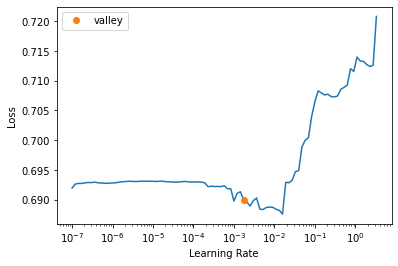

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.298209,0.300382,0.937374,07:48


> We got a 93.7% accuracy out of our custom model, which only trained for one epoch from scratch. It is actually really good.

> Let's have a break. We will look closely at some components in Part 2.

# Workshop Resources

> Go to [NLP Part 2](https://colab.research.google.com/github/AlaFalaki/workshop-materials/blob/main/2022-practical-deep-learning/02-NLP_Part2.ipynb) notebook. (PyTorch vs. FastAi)<br /><br />
> Also, this [Github Repository](https://github.com/AlaFalaki/workshop-materials/tree/main/2022-practical-deep-learning) contains all the notebooks and materials presented in this workshop.

# References

1. *Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. arXiv preprint arXiv:1301.3781.*

2. *Maas, A., Daly, R., Pham, P., Huang, D., Ng, A., & Potts, C. (2011). Learning Word Vectors for Sentiment Analysis. In Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies (pp. 142–150). Association for Computational Linguistics.*

3. *Howard, J., & Ruder, S. (2018). Universal language model fine-tuning for text classification. arXiv preprint arXiv:1801.06146.*